In [35]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as ss
from kapteyn import kmpfit
import math
from scipy.optimize import curve_fit

In [8]:
data = pf.open("Simple_absorption_line_spectra.fits")

In [126]:
spectra = data[0].data
error = data[1].data
wavelength = data[2].data

In [96]:
def gaus(x,mu,sigma):
    fac1 = ((x-mu)/sigma)**2 
    fac2 = 1/(math.sqrt(2*np.pi)*sigma)
     
    return fac2*np.exp(-fac1/2)


def fitting_func(x,mu1,sigma1,mu2,sigma2,frac1,frac2,frac3,a):
    continuum = a

    return frac1*gaus(x,mu1,sigma1)+frac2*gaus(x,mu2,sigma2)+frac3*continuum  

In [127]:
para_init = [2796.35,2,2803.53,2,0.5,0.5,0.5,0.0]

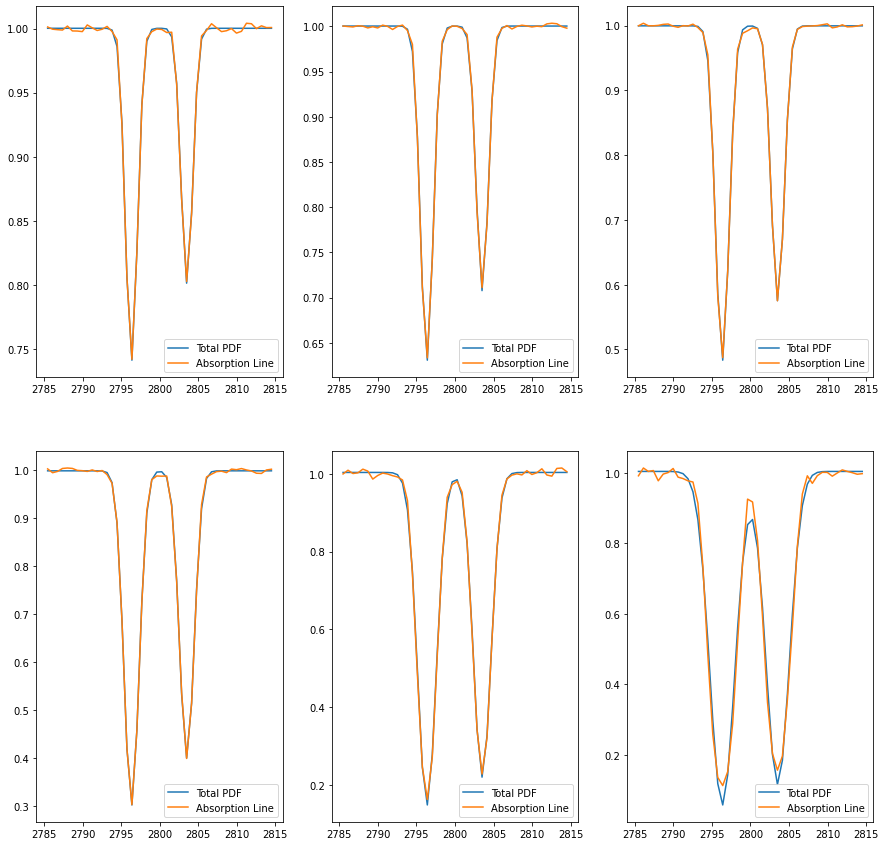

In [124]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    spectra_fit = spectra[i,:]
    best_fit_parameter, pcov = curve_fit(fitting_func,wavelength,spectra_fit,p0=para_init)
    plt.plot(wavelength,fitting_func(wavelength,*best_fit_parameter),label=r"Total PDF")
    plt.plot(wavelength,spectra_fit,label=r"Absorption Line")
    plt.legend()